In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hdf=pd.read_csv("HeartDisease.csv")
hdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1
1024,54.0,1.0,0.0,120.0,188.0,0.0,1.0,113.0,0.0,1.4,1.0,1.0,3.0,0


In [4]:
hdf1=hdf.drop(['sex','cp','fbs','restecg','exang','ca','thal','target'],axis=1)
hdf1

,age,trestbps,chol,thalach,oldpeak,slope
0,52.0,125.0,212.0,168.0,1.0,2.0
1,53.0,140.0,203.0,155.0,3.1,0.0
2,70.0,145.0,174.0,125.0,2.6,0.0
3,61.0,148.0,203.0,161.0,0.0,2.0
4,62.0,138.0,294.0,106.0,1.9,1.0
...,...,...,...,...,...,...
1021,60.0,125.0,258.0,141.0,2.8,1.0
1022,47.0,110.0,275.0,118.0,1.0,1.0
1023,50.0,110.0,254.0,159.0,0.0,2.0
1024,54.0,120.0,188.0,113.0,1.4,1.0


In [5]:
# Correlation Matrix
corrMatrix=hdf1.corr()
corrMatrix

,age,trestbps,chol,thalach,oldpeak,slope
age,1.000000,0.271121,0.219823,-0.390227,0.208137,-0.169105
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434,-0.120445
chol,0.219823,0.127977,1.000000,-0.021772,0.064880,-0.014248
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,0.395308
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000,-0.575189
slope,-0.169105,-0.120445,-0.014248,0.395308,-0.575189,1.000000


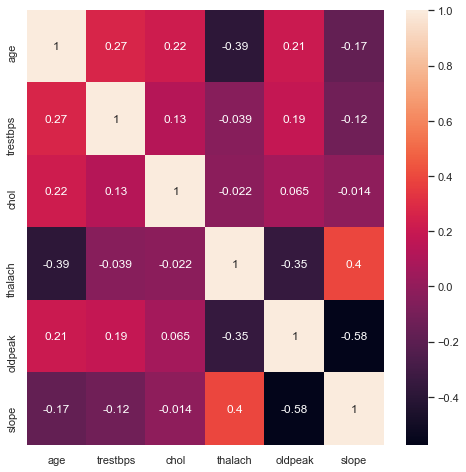

In [7]:
# Correlation Heatmap Matrix
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [4]:
# Contingency Table of slope and thal
contTable=pd.crosstab(index=hdf['slope'],columns=hdf['thal'])
contTable

thal,0.0,1.0,2.0,3.0
slope,,,,
0.0,0,11,27,36
1.0,4,46,187,245
2.0,3,7,330,129


In [5]:
# Chi-square test for independence of slope and thal
import scipy.stats as st
st.chi2_contingency(contTable)

(117.42380325053344,
 5.661854415938012e-23,
 6,
 array([[  0.50536585,   4.6204878 ,  39.27414634,  29.6       ],
        [  3.29170732,  30.09560976, 255.81268293, 192.8       ],
        [  3.20292683,  29.28390244, 248.91317073, 187.6       ]]))

In [25]:
# Pvalue<0.05: Reject Ho i.e. There is association between slope and thal

In [6]:
contTable1=pd.crosstab(index=hdf['sex'],columns=hdf['cp'])
contTable1

cp,0.0,1.0,2.0,3.0
sex,,,,
0.0,133,57,109,13
1.0,364,110,175,64


In [7]:
# Chi-square test for independence of sex and cp
st.chi2_contingency(contTable1)

(19.392919905275754,
 0.00022673403108398679,
 3,
 array([[151.28195122,  50.83317073,  86.44682927,  23.43804878],
        [345.71804878, 116.16682927, 197.55317073,  53.56195122]]))

In [8]:
contTable2=pd.crosstab(index=hdf['restecg'],columns=hdf['exang'])
contTable2

exang,0.0,1.0
restecg,,
0.0,310,187
1.0,363,150
2.0,7,8


In [9]:
# Chi-square test for independence of restecg and exang
st.chi2_contingency(contTable2)

(10.589214156026928,
 0.005018585900878836,
 2,
 array([[329.71707317, 167.28292683],
        [340.33170732, 172.66829268],
        [  9.95121951,   5.04878049]]))